<a href="https://colab.research.google.com/github/nv-hiep/flight_delay_prediction/blob/master/step1_read_data_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: READ DATA AND ANALYSIS**

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 1. Import Libraries



In [3]:
import os
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline  

# 2. Note on the data and analysis

The data of flights can be found here: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=

The descriptions are found here: http://stat-computing.org/dataexpo/2009/the-data.html

**I will consider the data of flights ONLY in January and February 2017. Here I used Google Colab, and it may consume time, so I will use the data of the 02 months for the analysis.**

**This dataset is composed by the following variables:**

YEAR: 2017

QUARTER: 1-4

MONTH 1-12

DAY_OF_MONTH: 1-31

DAY_OF_WEEK: 1-7

OP_UNIQUE_CARRIER: Two letter carrier abbreviation

TAIL_NUM: Plane tail number

OP_CARRIER_FL_NUM: Flight number

ORIGIN: Airport codes for origin

DEST: Airport codes for destination

CRS_DEP_TIME: Scheduled departure time, local timezone

DEP_TIME: Departure times, local timezone

DEP_DELAY: Departure delay, in minutes, Negative times represent early departures

TAXI_OUT: taxi out time in minutes

TAXI_IN: taxi in time, in minutes

CRS_ARR_TIME: Scheduled arrival time

ARR_TIME Arrival times, local timezone

ARR_DELAY: Arrival delay, in minutes, Negative times represent early arrivals

CANCELLED: the flight was cancelled or not

CANCELLATION_CODE: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

DIVERTED: 1 = yes, 0 = no

CRS_ELAPSED_TIME: Scheduled elapsed time in minutes

ACTUAL_ELAPSED_TIME: Actual elapsed time in minutes

AIR_TIME: Amount of time spent in the air, in minutes

DISTANCE: Distance flown, in miles

CARRIER_DELAY: 	in minutes

WEATHER_DELAY: in minutes

NAS_DELAY: in minutes

SECURITY_DELAY: in minutes

LATE_AIRCRAFT_DELAY: in minutes



# 3. Data directory

In [4]:
data_dir = '/content/gdrive/My Drive/data'
%cd '/content/gdrive/My Drive/data'

current_dir = os.getcwd()
print(current_dir)
data_path = os.path.join(data_dir, 'flights', '')
print(data_path)

/content/gdrive/My Drive/data
/content/gdrive/My Drive/data
/content/gdrive/My Drive/data/flights/


# 4. Read data sets

## Read carrier data

In [5]:
# Read carrier data from csv
carriers = pd.read_csv( os.path.join(data_path, 'carriers.csv') )
print('Total number of unique carriers: ', len(carriers))
carriers.head()

Total number of unique carriers:  1491


,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [6]:
carriers.rename({'Description': 'AIRLINE_NAME', 'Code' : 'code'}, axis=1, inplace=True)  # new method
carriers.head()

,code,AIRLINE_NAME
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [7]:
# Checking the null values
carriers.isnull().sum()

code            1
AIRLINE_NAME    0
dtype: int64

In [8]:
# Checking the null values
carriers[carriers.code.isnull()]

,code,AIRLINE_NAME
873,NaN,North American Airlines


In [9]:
# Google search and correct the code for North American Airlines
carriers.at[873, 'code'] = 'NA'

In [10]:
# Checking the null values
carriers[carriers.code.isnull()]

,code,AIRLINE_NAME


In [11]:
# Checking the null values
carriers[carriers.AIRLINE_NAME == 'North American Airlines']

,code,AIRLINE_NAME
873,NA,North American Airlines


## Read airport data

In [12]:
# Read airport data from csv
airports = pd.read_csv( os.path.join(data_path, 'airports.csv') )
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [13]:
# Checking the null values
airports.isnull().sum()

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

In [14]:
# Checking the null values
airports[airports.city.isnull()]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


In [15]:
# Google search and correct the code for North American Airlines
airports.at[1136, 'city']  = 'Carlsbad'
airports.at[1136, 'state'] = 'CA'

airports.at[1715, 'city']  = 'Beaufort County'
airports.at[1715, 'state'] = 'SC'

airports.at[2251, 'city']  = 'Ward County'
airports.at[2251, 'state'] = 'ND'

airports.at[2312, 'city']  = 'Marquette County'
airports.at[2312, 'state'] = 'MI'

airports.at[2752, 'city']  = 'Box Elder'
airports.at[2752, 'state'] = 'SD'

airports.at[2759, 'city']  = 'Emerado'
airports.at[2759, 'state'] = 'ND'

airports.at[2794, 'city']  = 'Prachin Buri'
airports.at[2794, 'state'] = 'Prachin Buri'

airports.at[2795, 'city']  = 'Babelthoup'
airports.at[2795, 'state'] = 'Babelthoup'

airports.at[2900, 'city']  = 'Centre County'
airports.at[2900, 'state'] = 'PA'

airports.at[2964, 'city']  = 'Spokane'
airports.at[2964, 'state'] = 'WA'

airports.at[3001, 'city']  = 'Tinian'
airports.at[3001, 'state'] = 'Northern Mariana'

airports.at[3355, 'city']  = ' Yap main island'
airports.at[3355, 'state'] = 'Yap'


In [16]:
# Checking the null values
airports[airports.city.isnull()]

,iata,airport,city,state,country,lat,long


In [17]:
# Checking the null values
airports.isnull().sum()

iata       0
airport    0
city       0
state      0
country    0
lat        0
long       0
dtype: int64

## Read flight data

### Data for January 2017

In [18]:
df1 = pd.read_csv(os.path.join(data_path, '2017_jan.csv') )
df1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 30
0,2017,1,1,16,1,AA,N3FYAA,2186,DFW,PSP,910,913.0,3.0,26.0,5.0,1018,1024.0,6.0,0.0,NaN,0.0,188.0,191.0,160.0,1126.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,17,2,AA,N3ASAA,2186,DFW,PSP,910,904.0,-6.0,31.0,4.0,1018,1011.0,-7.0,0.0,NaN,0.0,188.0,187.0,152.0,1126.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,18,3,AA,N3AKAA,2186,DFW,PSP,910,908.0,-2.0,44.0,5.0,1018,1028.0,10.0,0.0,NaN,0.0,188.0,200.0,151.0,1126.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,0.0,NaN,0.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0,NaN
4,2017,1,1,20,5,AA,N3NBAA,2186,DFW,PSP,910,903.0,-7.0,20.0,6.0,1018,1011.0,-7.0,0.0,NaN,0.0,188.0,188.0,162.0,1126.0,NaN,NaN,NaN,NaN,NaN,NaN


### Data for February 2017

In [19]:
df2 = pd.read_csv(os.path.join(data_path, '2017_feb.csv') )
df2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 30
0,2017,1,2,16,4,DL,N964AT,1775,ATL,HSV,2125,2123.0,-2.0,11.0,6.0,2125,2114.0,-11.0,0.0,NaN,0.0,60.0,51.0,34.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,2,16,4,DL,N727TW,1776,LAX,JFK,2245,2241.0,-4.0,21.0,11.0,720,712.0,-8.0,0.0,NaN,0.0,335.0,331.0,299.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,2,16,4,DL,N961AT,1777,SMF,LAX,1918,1950.0,32.0,23.0,11.0,2055,2130.0,35.0,0.0,NaN,0.0,97.0,100.0,66.0,373.0,3.0,0.0,3.0,0.0,29.0,NaN
3,2017,1,2,16,4,DL,N970DL,1778,ATL,MEM,1641,1637.0,-4.0,25.0,4.0,1705,1700.0,-5.0,0.0,NaN,0.0,84.0,83.0,54.0,332.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,2,16,4,DL,N970DL,1778,MEM,ATL,1745,1742.0,-3.0,18.0,15.0,2020,2010.0,-10.0,0.0,NaN,0.0,95.0,88.0,55.0,332.0,NaN,NaN,NaN,NaN,NaN,NaN


### Merge the data of the 02 months

In [20]:
# Concatenating the two data=frames
frames = [df1, df2]
# df = pd.concat(frames, keys=['jan', 'feb'])
df = pd.concat(frames)

In [21]:
# Print some infor
print('Shape: ', df.shape)
print('Number of columns/features: ', len(df.columns))
print('Columns/features: \n', df.columns)
print('Data types of features: \n', df.dtypes)

Shape:  (860534, 31)
Number of columns/features:  31
Columns/features: 
 Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 30'],
      dtype='object')
Data types of features: 
 YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER       object
TAIL_NUM                object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float6

# 5. Analysis

## 5.1 Check null values, remove cancelled and diverted flights

I'll remove cancelled and diverted flights because they're unecessary for this analysis.

In [22]:
# Check null values
df.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                 1249
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                14721
DEP_DELAY               14723
TAXI_OUT                15035
TAXI_IN                 15822
CRS_ARR_TIME                0
ARR_TIME                15822
ARR_DELAY               17664
CANCELLED                   0
CANCELLATION_CODE      845336
DIVERTED                    0
CRS_ELAPSED_TIME            5
ACTUAL_ELAPSED_TIME     17664
AIR_TIME                17664
DISTANCE                    0
CARRIER_DELAY          698571
WEATHER_DELAY          698571
NAS_DELAY              698571
SECURITY_DELAY         698571
LATE_AIRCRAFT_DELAY    698571
Unnamed: 30            860534
dtype: int64

In [23]:
# Remove unnecessary columns
df.drop(['CANCELLATION_CODE', 'Unnamed: 30'], axis=1, inplace=True)

In [24]:
df.isnull().sum(axis=0)

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                 1249
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                14721
DEP_DELAY               14723
TAXI_OUT                15035
TAXI_IN                 15822
CRS_ARR_TIME                0
ARR_TIME                15822
ARR_DELAY               17664
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME            5
ACTUAL_ELAPSED_TIME     17664
AIR_TIME                17664
DISTANCE                    0
CARRIER_DELAY          698571
WEATHER_DELAY          698571
NAS_DELAY              698571
SECURITY_DELAY         698571
LATE_AIRCRAFT_DELAY    698571
dtype: int64

In [25]:
# Calculate the percentage of cancelled flights
df['CANCELLED'].value_counts(normalize=True) * 100

0.0    98.233887
1.0     1.766113
Name: CANCELLED, dtype: float64

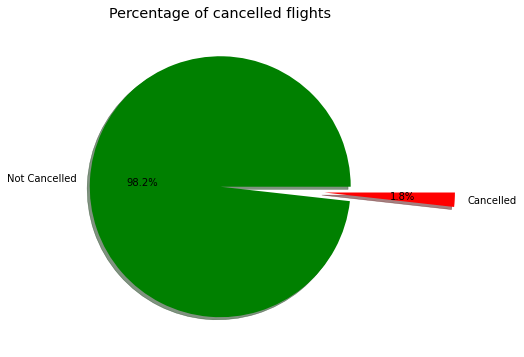

In [26]:
plt.figure(figsize=(6,6))
colors = ['g', 'r']
labels = ['Not Cancelled', 'Cancelled']
explode = (0,0.8)
plt.pie(df['CANCELLED'].value_counts(normalize=True) * 100, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Percentage of cancelled flights')
plt.show()

Pie char for cancelled and departed flights, only 1.8\% of the flights are cancelled.

In [27]:
# Remove cancelled flights, they're not necessary for this analysis
df = df[df.CANCELLED != 1]

# Check if the cancelled flights have been removed
df['CANCELLED'].value_counts(normalize=True) * 100

0.0    100.0
Name: CANCELLED, dtype: float64

In [28]:
# Calculate the percentage of diverted flights
df['DIVERTED'].value_counts(normalize=True) * 100

0.0    99.708282
1.0     0.291718
Name: DIVERTED, dtype: float64

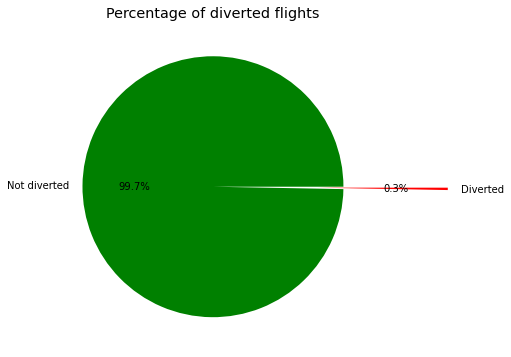

In [29]:
plt.figure(figsize=(6,6))
colors = ['g', 'r']
labels = ['Not diverted', 'Diverted']
explode = (0,0.8)
plt.pie(df['DIVERTED'].value_counts(normalize=True) * 100, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', shadow=False)
plt.title('Percentage of diverted flights')
plt.show()

Pie char for diverted and normal flights, only 0.3\% of the flights are diverted.

In [30]:
# Also remove diverted flights
df = df[df.DIVERTED != 1]
# df.isnull().sum(axis=0)

# Check if the diverted flights have been removed
df['DIVERTED'].value_counts(normalize=True) * 100

0.0    100.0
Name: DIVERTED, dtype: float64

In [31]:
df.isnull().sum(axis=0)

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          680907
WEATHER_DELAY          680907
NAS_DELAY              680907
SECURITY_DELAY         680907
LATE_AIRCRAFT_DELAY    680907
dtype: int64

In [32]:
# The LATE_AIRCRAFT_DELAY (in minutes) is the delay caused by the aircraft
# (i.e. an aircraft which is scheduled to depart at a specific timing arrived late from its previous flight and hence the delay spilled over to the next departure)
# A null value in the LATE_AIRCRAFT_DELAY would mean that there is no delay incurred from the late arrival of the previous flight.
# I'll set all null values to be 0.
df.fillna(value={'LATE_AIRCRAFT_DELAY' : 0}, inplace=True)

In [33]:
# Similarly, set all null values in CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY to be 0
df.fillna(value={'CARRIER_DELAY' : 0, 'WEATHER_DELAY' : 0, 'NAS_DELAY' : 0, 'SECURITY_DELAY' : 0}, inplace=True)

In [34]:
# Check null values
df.isnull().sum(axis=0)

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_UNIQUE_CARRIER      0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [35]:
# Check: No DIVERTED flights anymore
df.DIVERTED.unique().tolist()

[0.0]

In [36]:
# Check: No CANCELLED flights anymore
df.CANCELLED.unique().tolist()

[0.0]

In [37]:
# Dropping DIVERTED & CANCELLED columns
df.drop(['DIVERTED', 'CANCELLED'], axis=1, inplace=True)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017,1,1,16,1,AA,N3FYAA,2186,DFW,PSP,910,913.0,3.0,26.0,5.0,1018,1024.0,6.0,188.0,191.0,160.0,1126.0,0.0,0.0,0.0,0.0,0.0
1,2017,1,1,17,2,AA,N3ASAA,2186,DFW,PSP,910,904.0,-6.0,31.0,4.0,1018,1011.0,-7.0,188.0,187.0,152.0,1126.0,0.0,0.0,0.0,0.0,0.0
2,2017,1,1,18,3,AA,N3AKAA,2186,DFW,PSP,910,908.0,-2.0,44.0,5.0,1018,1028.0,10.0,188.0,200.0,151.0,1126.0,0.0,0.0,0.0,0.0,0.0
3,2017,1,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0
4,2017,1,1,20,5,AA,N3NBAA,2186,DFW,PSP,910,903.0,-7.0,20.0,6.0,1018,1011.0,-7.0,188.0,188.0,162.0,1126.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# OK! No more null/nan values
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842870 entries, 0 to 410516
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 842870 non-null  int64  
 1   QUARTER              842870 non-null  int64  
 2   MONTH                842870 non-null  int64  
 3   DAY_OF_MONTH         842870 non-null  int64  
 4   DAY_OF_WEEK          842870 non-null  int64  
 5   OP_UNIQUE_CARRIER    842870 non-null  object 
 6   TAIL_NUM             842870 non-null  object 
 7   OP_CARRIER_FL_NUM    842870 non-null  int64  
 8   ORIGIN               842870 non-null  object 
 9   DEST                 842870 non-null  object 
 10  CRS_DEP_TIME         842870 non-null  int64  
 11  DEP_TIME             842870 non-null  float64
 12  DEP_DELAY            842870 non-null  float64
 13  TAXI_OUT             842870 non-null  float64
 14  TAXI_IN              842870 non-null  float64
 15  CRS_ARR_TIME     

## 5.2 Add carrier descriptions

In [39]:
# Add carrier descriptions
df = pd.merge(df, carriers, how='left', left_on='OP_UNIQUE_CARRIER', right_on='code')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,code,AIRLINE_NAME
0,2017,1,1,16,1,AA,N3FYAA,2186,DFW,PSP,910,913.0,3.0,26.0,5.0,1018,1024.0,6.0,188.0,191.0,160.0,1126.0,0.0,0.0,0.0,0.0,0.0,AA,American Airlines Inc.
1,2017,1,1,17,2,AA,N3ASAA,2186,DFW,PSP,910,904.0,-6.0,31.0,4.0,1018,1011.0,-7.0,188.0,187.0,152.0,1126.0,0.0,0.0,0.0,0.0,0.0,AA,American Airlines Inc.
2,2017,1,1,18,3,AA,N3AKAA,2186,DFW,PSP,910,908.0,-2.0,44.0,5.0,1018,1028.0,10.0,188.0,200.0,151.0,1126.0,0.0,0.0,0.0,0.0,0.0,AA,American Airlines Inc.
3,2017,1,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0,AA,American Airlines Inc.
4,2017,1,1,20,5,AA,N3NBAA,2186,DFW,PSP,910,903.0,-7.0,20.0,6.0,1018,1011.0,-7.0,188.0,188.0,162.0,1126.0,0.0,0.0,0.0,0.0,0.0,AA,American Airlines Inc.


In [40]:
df.drop(['code'], axis=1, inplace=True)

## 5.3 Delay Analysis

In [41]:
# Set the delay threshold
delay_thresh = 30 # minutes

I computed the summary statistics of the departure and arrival delays of all flights to gain a broad understanding of the data.

*   Departure delay is the difference between the official departure time and the actual departure time of the flight measured in minutes.

*   Arrival delay is the difference between the official arrival time and the actual departure time of the flight measured in minutes.

*   Positive values for delay indicate that the flight was delayed, negative values indicate the flight departed/arrived early

In [42]:
# 'ARR_DELAY', 'DEP_DELAY', 'AIR_TIME' in [minutes]
# DISTANCE in [km]
df[['ARR_DELAY', 'DEP_DELAY']].describe()


,ARR_DELAY,DEP_DELAY
count,842870.000000,842870.000000
mean,3.956417,9.628100
std,45.889549,43.125623
min,-98.000000,-59.000000
25%,-16.000000,-5.000000
50%,-6.000000,-2.000000
75%,8.000000,6.000000
max,1944.000000,1970.000000


The average arrival delay is only around 4 minutes. In addition, the median value is -6 minutes, suggesting the majority of flights actually arrive earlier than their expected time of arrival.

To illustrate this, I created a pie chart depicting the percentage of flights for each interval of arrival delay.

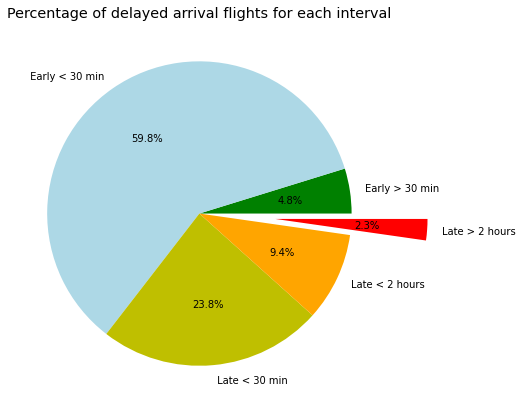

In [43]:
# labels = ['Early',' Late < 30 min', 'Late < 1 hours', 'Late < 2 hours', 'Late > 2 hours']
# bins   = [-100, 0, 30, 60, 120, 1945]

labels = ['Early > 30 min',' Early < 30 min',' Late < 30 min', 'Late < 2 hours', 'Late > 2 hours']
bins   = [-100, -30, 0, 30, 120, 1945]


df['ARR_DELAY_BINS'] = pd.cut(df['ARR_DELAY'], bins=bins, labels=labels)
a = df.groupby('ARR_DELAY_BINS').size()
# print(a)

# Plot pie chart
plt.figure(figsize=(7,7))
colors = ['g', 'lightblue', 'y', 'orange', 'r']
explode = (0, 0, 0, 0, 0.5)
plt.pie(a, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', shadow=False)
plt.title('Percentage of delayed arrival flights for each interval')
plt.show()

# Drop the newly added ARR_DELAY_BINS column
df.drop(['ARR_DELAY_BINS'], axis=1, inplace=True)

As shown, ~65% of flights arrive early and only ~12% of flights arrive more than 30 minutes late.

The vast majority of flights arrive ahead of schedule. Moreover, only around 12% of flights are late by more than 30 minutes.

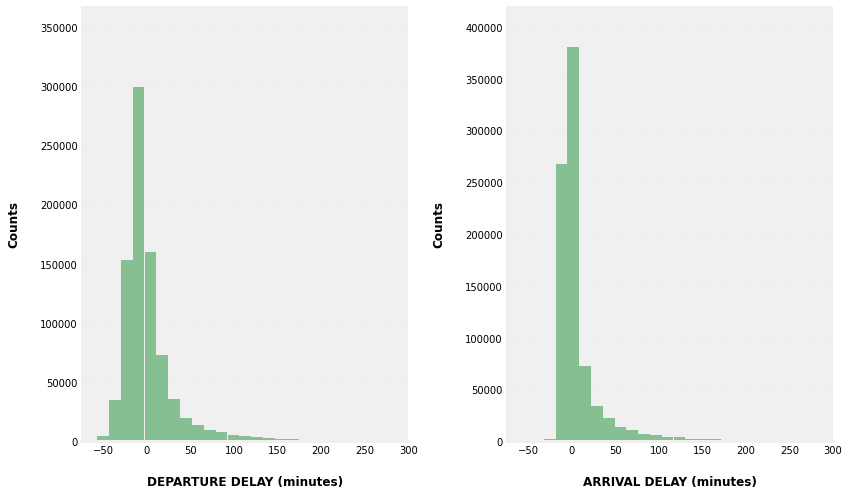

In [44]:
# ax = df.hist(column=['ARR_DELAY', 'DEP_DELAY'], bins=100, grid=False, figsize=(12,8), layout=(1,2), color='#86bf91', zorder=2, rwidth=0.9, density=1)
ax = df.hist(column=['ARR_DELAY', 'DEP_DELAY'], bins=150, grid=False, figsize=(12,8), layout=(1,2), color='#86bf91', zorder=2, rwidth=0.99)

ax = ax[0]
for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    xlabel = "ARRIVAL DELAY (minutes)" if i == 1 else "DEPARTURE DELAY (minutes)"
    x.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

    # Set log-scale for y-axis
    # x.set_yscale('log')

    x.set_xlim(-75, 300)

Histograms of departure and arrival delays (number of flights vs minutes). The average arrival delay is only around 4 minutes, the average departure delay is only around 9 minutes.

## 5.4 Causes of arrival delay

### a. Carrier delay

In [45]:
carrier_delay =  df[df['CARRIER_DELAY'] > 0]
carrier_delay = carrier_delay.reset_index()

carrier_delay.CARRIER_DELAY.unique().tolist()[:15]

carrier_delay = carrier_delay.drop('index',axis=1)
carrier_delay.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,23,1,AA,N3LEAA,2186,DFW,PSP,910,911.0,1.0,17.0,9.0,1018,1034.0,16.0,188.0,203.0,177.0,1126.0,1.0,0.0,15.0,0.0,0.0,American Airlines Inc.
1,2017,1,1,8,7,AA,N3NGAA,2186,PHL,DFW,500,652.0,112.0,30.0,16.0,750,940.0,110.0,230.0,228.0,182.0,1303.0,110.0,0.0,0.0,0.0,0.0,American Airlines Inc.
2,2017,1,1,12,4,AA,N4WNAA,2190,STL,DFW,1726,1754.0,28.0,13.0,12.0,1924,2001.0,37.0,118.0,127.0,102.0,550.0,28.0,0.0,9.0,0.0,0.0,American Airlines Inc.
3,2017,1,1,20,5,AA,N550AA,2190,STL,DFW,1726,1840.0,74.0,11.0,12.0,1924,2035.0,71.0,118.0,115.0,92.0,550.0,4.0,0.0,0.0,0.0,67.0,American Airlines Inc.
4,2017,1,1,31,2,AA,N439AA,2190,STL,DFW,1726,1808.0,42.0,14.0,6.0,1924,1951.0,27.0,118.0,103.0,83.0,550.0,21.0,0.0,0.0,0.0,6.0,American Airlines Inc.


### b. Weather delay

In [46]:
weather_delay =  df[df['WEATHER_DELAY'] > 0]
weather_delay = weather_delay.reset_index()

weather_delay = weather_delay.drop('index', axis=1)
weather_delay.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,9,1,AA,N391AA,2193,ORD,MIA,1845,1900.0,15.0,57.0,6.0,2255,2327.0,32.0,190.0,207.0,144.0,1197.0,0.0,15.0,17.0,0.0,0.0,American Airlines Inc.
1,2017,1,1,29,7,AA,N5FJAA,2193,ORD,MIA,1845,1855.0,10.0,38.0,15.0,2255,2320.0,25.0,190.0,205.0,152.0,1197.0,0.0,10.0,15.0,0.0,0.0,American Airlines Inc.
2,2017,1,1,10,2,AA,N3HEAA,2193,SNA,ORD,1115,1254.0,99.0,17.0,43.0,1715,1922.0,127.0,240.0,268.0,208.0,1726.0,0.0,99.0,28.0,0.0,0.0,American Airlines Inc.
3,2017,1,1,10,2,AA,N004AA,2195,JAC,DFW,1312,1407.0,55.0,44.0,11.0,1656,1800.0,64.0,164.0,173.0,118.0,1047.0,0.0,13.0,9.0,0.0,42.0,American Airlines Inc.
4,2017,1,1,23,1,AA,N026AA,2195,JAC,DFW,1312,1316.0,4.0,48.0,11.0,1656,1726.0,30.0,164.0,190.0,131.0,1047.0,0.0,4.0,26.0,0.0,0.0,American Airlines Inc.


### c. Security delay

In [47]:
security_delay =  df[df['SECURITY_DELAY'] > 0]
security_delay = security_delay.reset_index()

security_delay = security_delay.drop('index', axis=1)
security_delay.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,14,6,AA,N3NMAA,2206,DCA,MIA,2013,2103.0,50.0,11.0,6.0,2309,2332.0,23.0,176.0,149.0,132.0,919.0,0.0,0.0,0.0,23.0,0.0,American Airlines Inc.
1,2017,1,1,2,1,AA,N3LFAA,2235,SMF,DFW,55,59.0,4.0,26.0,9.0,615,641.0,26.0,200.0,222.0,187.0,1431.0,0.0,0.0,22.0,4.0,0.0,American Airlines Inc.
2,2017,1,1,1,7,AS,N508AS,856,KOA,SJC,1455,1508.0,13.0,29.0,11.0,2157,2212.0,15.0,302.0,304.0,264.0,2384.0,0.0,0.0,2.0,13.0,0.0,Alaska Airlines Inc.
3,2017,1,1,1,7,AS,N597AS,873,KOA,ANC,1030,1040.0,10.0,15.0,4.0,1733,1804.0,31.0,363.0,384.0,365.0,2874.0,0.0,0.0,21.0,10.0,0.0,Alaska Airlines Inc.
4,2017,1,1,2,1,AS,N791AS,176,JNU,SEA,515,523.0,8.0,17.0,10.0,830,854.0,24.0,135.0,151.0,124.0,909.0,0.0,0.0,16.0,8.0,0.0,Alaska Airlines Inc.


### d. NAS delay

In [48]:
nas_delay =  df[df['NAS_DELAY'] > 0]
nas_delay = nas_delay.reset_index()

nas_delay = nas_delay.drop('index', axis=1)
nas_delay.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,19,4,AA,N3LSAA,2186,DFW,PSP,910,905.0,-5.0,41.0,8.0,1018,1047.0,29.0,188.0,222.0,173.0,1126.0,0.0,0.0,29.0,0.0,0.0,American Airlines Inc.
1,2017,1,1,21,6,AA,N3KPAA,2186,DFW,PSP,910,907.0,-3.0,26.0,5.0,1018,1033.0,15.0,188.0,206.0,175.0,1126.0,0.0,0.0,15.0,0.0,0.0,American Airlines Inc.
2,2017,1,1,22,7,AA,N3CDAA,2186,DFW,PSP,910,902.0,-8.0,32.0,6.0,1018,1038.0,20.0,188.0,216.0,178.0,1126.0,0.0,0.0,20.0,0.0,0.0,American Airlines Inc.
3,2017,1,1,23,1,AA,N3LEAA,2186,DFW,PSP,910,911.0,1.0,17.0,9.0,1018,1034.0,16.0,188.0,203.0,177.0,1126.0,1.0,0.0,15.0,0.0,0.0,American Airlines Inc.
4,2017,1,1,24,2,AA,N3HXAA,2186,DFW,PSP,910,905.0,-5.0,29.0,9.0,1018,1042.0,24.0,188.0,217.0,179.0,1126.0,0.0,0.0,24.0,0.0,0.0,American Airlines Inc.


### e. Late aircraft delay

In [49]:
aircraft_delay =  df[df['LATE_AIRCRAFT_DELAY'] > 0]
aircraft_delay = aircraft_delay.reset_index()

aircraft_delay = aircraft_delay.drop('index', axis=1)
aircraft_delay.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_NAME
0,2017,1,1,14,6,AA,N439AA,2190,STL,DFW,1726,1751.0,25.0,12.0,10.0,1924,1942.0,18.0,118.0,111.0,89.0,550.0,0.0,0.0,0.0,0.0,18.0,American Airlines Inc.
1,2017,1,1,20,5,AA,N550AA,2190,STL,DFW,1726,1840.0,74.0,11.0,12.0,1924,2035.0,71.0,118.0,115.0,92.0,550.0,4.0,0.0,0.0,0.0,67.0,American Airlines Inc.
2,2017,1,1,31,2,AA,N439AA,2190,STL,DFW,1726,1808.0,42.0,14.0,6.0,1924,1951.0,27.0,118.0,103.0,83.0,550.0,21.0,0.0,0.0,0.0,6.0,American Airlines Inc.
3,2017,1,1,2,1,AA,N3KJAA,2191,FLL,DFW,1320,1407.0,47.0,17.0,9.0,1538,1618.0,40.0,198.0,191.0,165.0,1119.0,4.0,0.0,0.0,0.0,36.0,American Airlines Inc.
4,2017,1,1,10,2,AA,N3MDAA,2192,DCA,ORD,1930,2038.0,68.0,13.0,10.0,2046,2146.0,60.0,136.0,128.0,105.0,612.0,0.0,0.0,0.0,0.0,60.0,American Airlines Inc.


### Bar chart for causes of delay

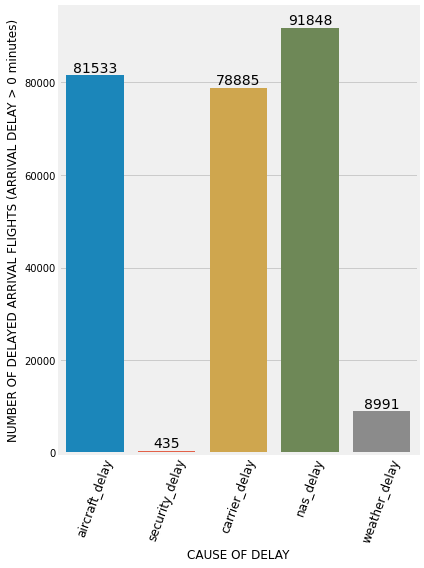

In [50]:
cause_names  = ['aircraft_delay', 'security_delay', 'carrier_delay', 'nas_delay','weather_delay']
count_values = [len(aircraft_delay), len(security_delay), len(carrier_delay), len(nas_delay), len(weather_delay)]

causes_of_delay = pd.DataFrame({'CAUSES': cause_names, 'COUNTS': count_values})

x = range(len(cause_names))

plt.figure(figsize=(6,8))
sns.barplot(x='CAUSES', y='COUNTS', data = causes_of_delay)

for i in x:
    plt.annotate(str(count_values[i]), xy=(x[i], count_values[i]), ha='center', va='bottom', size=14)

plt.ylabel('NUMBER OF DELAYED ARRIVAL FLIGHTS (ARRIVAL DELAY > 0 minutes)')
plt.xlabel('CAUSE OF DELAY')
plt.xticks(rotation=70, size=12)
plt.tight_layout()
plt.show()

Histograms of delayed arrival flights with respect to the causes of delay (January and February 2017). Most of delayed arrival flights are caused by NAS, aircraft and carrier (airline). Security caused a small number of delayed flights.

## 5.5 Arrival delay with respect to day of week

In [51]:
arrival_delay_dow = df[ df['ARR_DELAY'] > 0 ]
arrival_delay_dow = arrival_delay_dow.groupby(['DAY_OF_WEEK'])['ARR_DELAY'].count().reset_index(name='COUNTS')
arrival_delay_dow

,DAY_OF_WEEK,COUNTS
0,1,53557
1,2,42742
2,3,39202
3,4,44186
4,5,45584
5,6,30462
6,7,43269


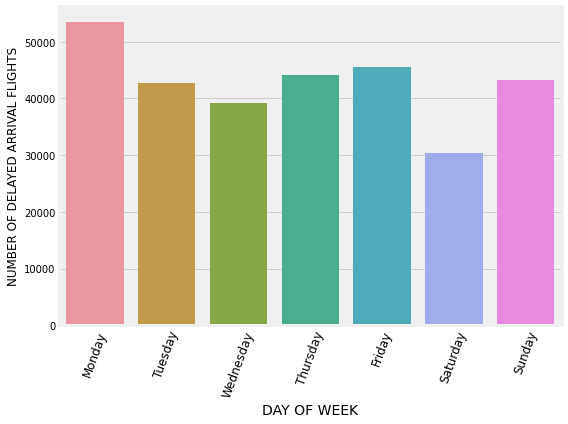

In [52]:
arrival_delay_dow['DAY_OF_WEEK'] = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

plt.figure(figsize=(8,6))
sns.barplot(x='DAY_OF_WEEK', y='COUNTS', data=arrival_delay_dow)
plt.ylabel('NUMBER OF DELAYED ARRIVAL FLIGHTS')
plt.xlabel('DAY OF WEEK', size = 14)
plt.xticks(rotation=70, size = 12)
plt.tight_layout()
plt.show()

Histograms of delayed arrival flights with respect to the day of week (January and February 2017). Most of flights arrived late on Mondays, Thursdays, Fridays and Sundays. Saturdays see fewer delayed flights.

## 5.6 Arrival delay with respect to day of month

In [53]:
arrival_delay_dom = df[ df['ARR_DELAY'] > 0 ].groupby(['DAY_OF_MONTH'])['ARR_DELAY'].count().reset_index(name='COUNTS')
arrival_delay_dom.head()

,DAY_OF_MONTH,COUNTS
0,1,9543
1,2,14385
2,3,12516
3,4,9077
4,5,10383


In [54]:
# For January 2017
arrival_delay_dom_jan = df[ ( (df['ARR_DELAY'] > 0) & (df['MONTH'] == 1 ) ) ].groupby(['DAY_OF_MONTH'])['ARR_DELAY'].count().reset_index(name='COUNTS')
print( len(arrival_delay_dom_jan.index) )

31


In [55]:
# For February 2017
arrival_delay_dom_feb = df[ ( (df['ARR_DELAY'] > 0) & (df['MONTH'] == 2 ) ) ].groupby(['DAY_OF_MONTH'])['ARR_DELAY'].count().reset_index(name='COUNTS')
print( len(arrival_delay_dom_feb.index) )

28


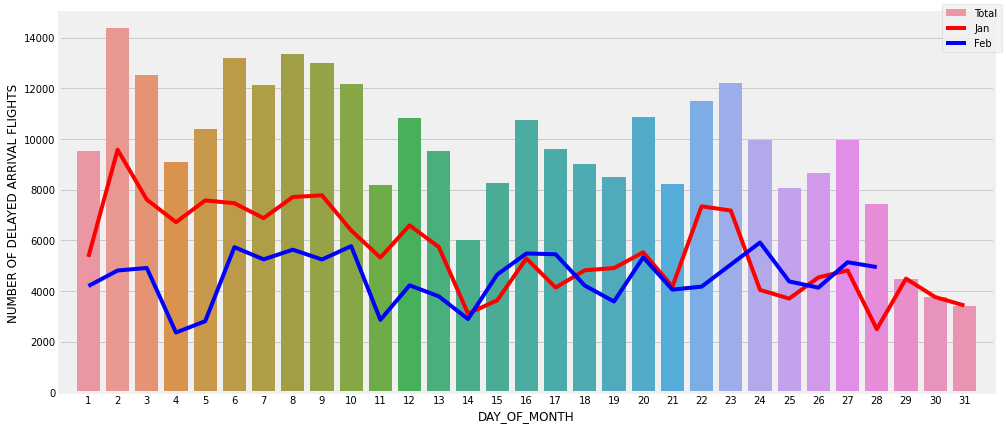

In [56]:
fig, ax = plt.subplots(figsize = (14, 6))

ax = sns.barplot(x='DAY_OF_MONTH', y='COUNTS', data=arrival_delay_dom, label='Total')
ax.set_ylabel('NUMBER OF DELAYED ARRIVAL FLIGHTS')
ax.set_ylim(0, 15_000)

ax2 = ax.twinx()
ax2.plot(range(len(arrival_delay_dom_jan.index)), arrival_delay_dom_jan.COUNTS, color='r', label='Jan')
ax2.set_ylabel('')
ax2.set_ylim(0, 15_000)
ax2.set_yticks([])

ax3 = ax.twinx()
ax3.plot(range(len(arrival_delay_dom_feb.index)), arrival_delay_dom_feb.COUNTS, color='b', label='Feb')
ax3.set_ylabel('')
ax3.set_ylim(0, 15_000)
ax3.set_yticks([])

plt.xlabel('DAY OF MONTH')
plt.xlim(-1,31)
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
fig.legend()
plt.show()

Histograms of delayed arrival flights with respect to day of month (January and February 2017). There were fewer delayed flights in the middle and in the end of the months.

The trends of the delay are similar for the two months.

## 5.7 Average delay of 20 busiest airports

In [57]:
# Top 20 busiest destinations
top20_dest = list(df['DEST'].value_counts().head(20).index)
print(top20_dest)

top20_dest_df = df[df['DEST'].isin(top20_dest)][['OP_UNIQUE_CARRIER','ORIGIN','DEST','ARR_DELAY', 'AIRLINE_NAME']]
top20_dest_df.head()

['ATL', 'ORD', 'LAX', 'DEN', 'DFW', 'PHX', 'SFO', 'LAS', 'MCO', 'IAH', 'SEA', 'DTW', 'MSP', 'BOS', 'SLC', 'CLT', 'EWR', 'FLL', 'JFK', 'BWI']


,OP_UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,AIRLINE_NAME
16,AA,PHL,DFW,-19.0,American Airlines Inc.
17,AA,PHL,DFW,25.0,American Airlines Inc.
18,AA,PHL,DFW,-4.0,American Airlines Inc.
19,AA,PHL,DFW,-3.0,American Airlines Inc.
20,AA,PHL,DFW,0.0,American Airlines Inc.


In [58]:
delays = (pd.DataFrame(top20_dest_df.groupby('DEST', as_index=False)['ARR_DELAY']
                       .mean())
          .sort_values(by='ARR_DELAY', ascending=False))
delays

,DEST,ARR_DELAY
18,SFO,23.585768
12,LAX,14.454765
7,EWR,12.737075
11,LAS,7.878745
19,SLC,5.367382
17,SEA,4.519772
10,JFK,4.420874
16,PHX,3.760159
1,BOS,3.363880
8,FLL,2.842291


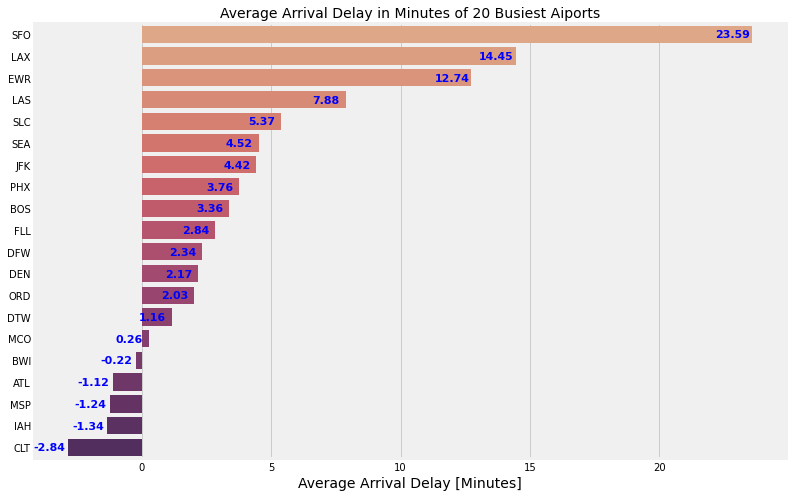

In [59]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='ARR_DELAY', y='DEST', data=delays, palette='flare')
ax.set_title('Average Arrival Delay in Minutes of 20 Busiest Aiports', size=14)
ax.set_ylabel('')
ax.set_xlabel('Average Arrival Delay [Minutes]', size=14)
fig = ax.get_figure()

for bar in ax.patches:
    ax.text(bar.get_width()-0.75,  bar.get_y()+bar.get_height()/2. + 0.15,
           '{:1.2f}'.format(bar.get_width()), ha='center', color='b', size='11', weight='bold')

SFO airport has a longest arrival delay with a mean of 24 minutes, the flights arrived at MCO are late only about 30 seconds. The flights landed at CLT aiport were about 3 minute early.

## 5.8 Arrival Delay for the top 20 airlines

I will next visualize the arrival delays for the top 20 airlines. The top 20 airlines are defined as the airlines with the top 20 most flights in the dataset.

In [60]:
# Top 12 busiest airlines
top20_airlines = list(df['OP_UNIQUE_CARRIER'].value_counts().head(20).index)
print(top20_airlines)

top20_airlines_df = df[df['OP_UNIQUE_CARRIER'].isin(top20_airlines)][['OP_UNIQUE_CARRIER','ORIGIN','DEST','ARR_DELAY', 'AIRLINE_NAME']]
top20_airlines_df.head()

['WN', 'AA', 'DL', 'OO', 'UA', 'EV', 'B6', 'AS', 'NK', 'F9', 'HA', 'VX']


,OP_UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,AIRLINE_NAME
0,AA,DFW,PSP,6.0,American Airlines Inc.
1,AA,DFW,PSP,-7.0,American Airlines Inc.
2,AA,DFW,PSP,10.0,American Airlines Inc.
3,AA,DFW,PSP,29.0,American Airlines Inc.
4,AA,DFW,PSP,-7.0,American Airlines Inc.


Out of the 20 airlines that have had the most flights, let's take a look at who has had delays greater than 30 minutes.

In [61]:
temp_df = top20_airlines_df.copy()

# Get delays greater than 30 minutes
temp_df['ARR_DELAY'] = temp_df['ARR_DELAY'].apply(lambda x: 30 if x >=30 else x)
temp_df['ARR_DELAY'] = temp_df['ARR_DELAY'].apply(lambda x: -30 if x <= -30 else x)

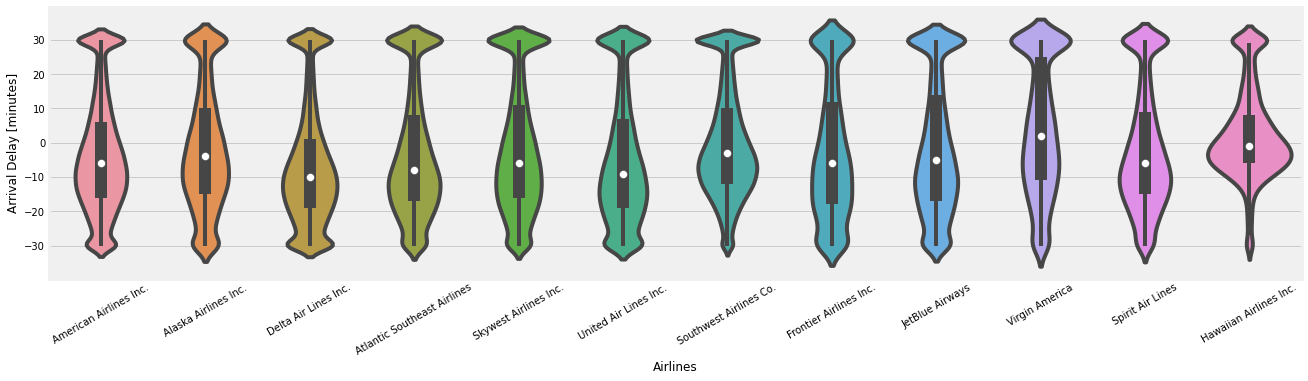

In [62]:
plt.figure(figsize=(20,5))
ax = sns.violinplot(x='AIRLINE_NAME', y='ARR_DELAY', data=temp_df)
ax.set_ylabel('Arrival Delay [minutes]')
ax.set_xlabel('Airlines')
label = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig = ax.get_figure()

The median for the top 20 airlines is around 0 to -10 minutes, meaning that most flights arrive before their scheduled time. The width of the plots at 30 represents the frequency of flights arriving 30 minutes or more after the scheduled arrival time.

Next, we will plot the percentage of all flights delayed more than 30 minutes.

In [63]:
# flights delayed more than 30 minutes.
delays = pd.DataFrame()

for uc in list(df['OP_UNIQUE_CARRIER'].unique()):
    percent_delay = len(df[(df['OP_UNIQUE_CARRIER']==uc) & (df['ARR_DELAY'] >= delay_thresh)].index)/len(df[df['OP_UNIQUE_CARRIER']==uc].index)*100
    delays = delays.append({'OP_UNIQUE_CARRIER': uc, 'PERCENT_DELAY': percent_delay}, ignore_index=True)

delays = pd.merge(delays, carriers, how='left', left_on='OP_UNIQUE_CARRIER', right_on='code')
delays.drop(['OP_UNIQUE_CARRIER', 'code'], axis=1, inplace=True)
delays.rename(index=str, columns={'Description':'AIRLINE'}, inplace=True)
delays.sort_values(by=['PERCENT_DELAY'], ascending=False, inplace=True)
delays

,PERCENT_DELAY,AIRLINE_NAME
9,22.044241,Virgin America
8,16.412357,JetBlue Airways
7,15.241845,Frontier Airlines Inc.
4,14.821740,Skywest Airlines Inc.
3,14.219496,Atlantic Southeast Airlines
10,13.625846,Spirit Air Lines
5,13.174533,United Air Lines Inc.
1,12.078159,Alaska Airlines Inc.
6,11.308053,Southwest Airlines Co.
0,9.423584,American Airlines Inc.


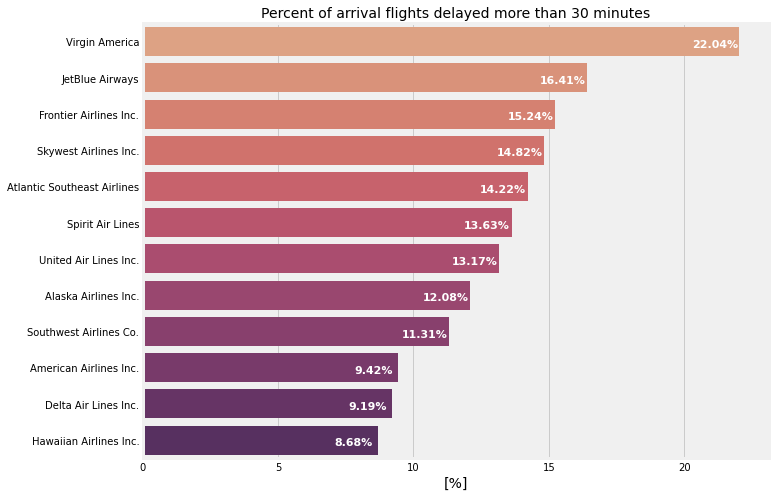

In [64]:
# Plot
plt.figure(figsize=(10,8))
ax = sns.barplot(x='PERCENT_DELAY', y='AIRLINE_NAME', data=delays, palette='flare')

ax.set_title('Percent of arrival flights delayed more than 30 minutes', size=14)
ax.set_ylabel('')
ax.set_xlabel('[%]', size=14)
fig = ax.get_figure()

for bar in ax.patches:
    ax.text(bar.get_width()-0.9,  bar.get_y()+bar.get_height()/2. + 0.15,
           '{:1.2f}%'.format(bar.get_width()), ha='center', color='white', size='11', weight='bold')

Percent of arrival flights delayed more than 30 minutes. Among the top 12 busiest airlines, Virgin America has the largest ratio of delayed flights with 22\%, the Hawaiian Ailiines Inc. has the lowest ratio.

## 5.9 Delay per Airline on the Destination Airports

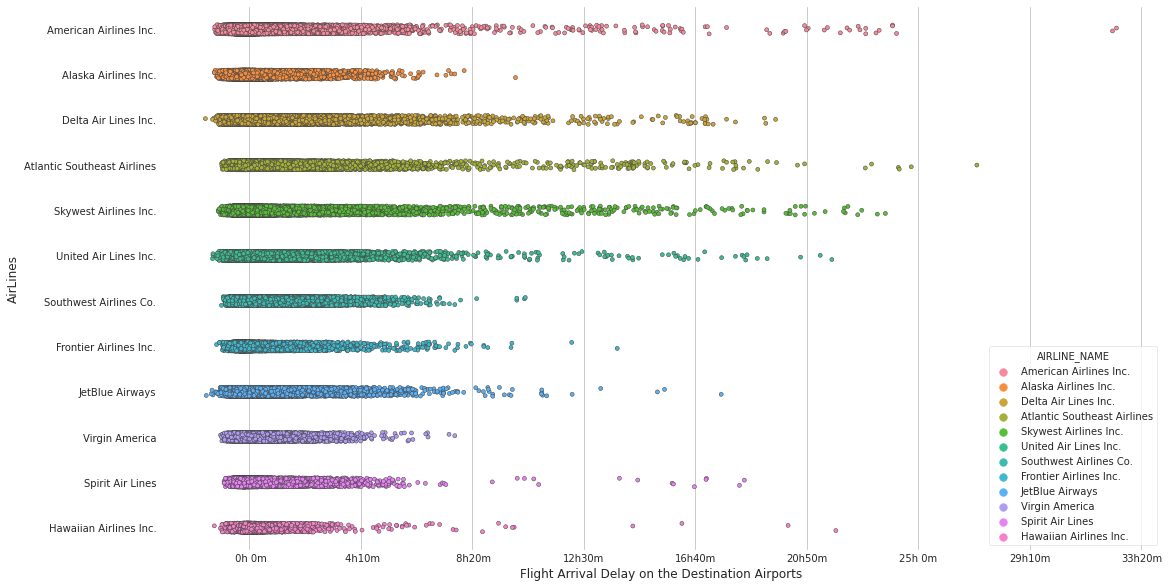

In [65]:
# Params for plots
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
sns.set_style('whitegrid')

# Initialize the Graph
fig_dim=(16,10)
fig, ax =plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Draw each observation with a scatterplot
sns.stripplot(x='ARR_DELAY', y='AIRLINE_NAME', hue='AIRLINE_NAME',data=df , size=4,  linewidth = 0.5,  jitter=True)
plt.xlabel('Flight Arrival Delay on the Destination Airports')
plt.ylabel('AirLines')
ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax.get_xticks()])
ax.yaxis.label.set_visible(True)

Sactter plot of delay per Airline on the Destination Airports. Among the top 12 busiest airlines, Virgin America still has the longest of delay up to 33h20m late, the Alaska Ailiines Inc. has the shortest delays up to 8h20m.

## 5.10 Origin/Destination Analysis

Next, I'll perform some analysis on the origin and destination airports. First, find the top 10 busiest airports in terms of flight frequency. The ranking of airports are found to be consistent when counting for both origin and destination, and for each airport, the number of incoming and outgoing flights are roughly equal (as seen below).

In [66]:
origin_airport_counts = df['ORIGIN'].value_counts().to_dict()

origin_airport_counts = sorted(origin_airport_counts.items(), key=lambda x: x[1], reverse=True)
print( origin_airport_counts[:10] )

top10_origin_airports = [x[0] for x in origin_airport_counts[:10]]
top10_origin_airports_counts = [x[1] for x in origin_airport_counts[:10]]
print(top10_origin_airports)

del origin_airport_counts

[('ATL', 56888), ('ORD', 35923), ('LAX', 32281), ('DEN', 32073), ('DFW', 28685), ('PHX', 24871), ('SFO', 24140), ('LAS', 23246), ('MCO', 20769), ('IAH', 20501)]
['ATL', 'ORD', 'LAX', 'DEN', 'DFW', 'PHX', 'SFO', 'LAS', 'MCO', 'IAH']


In [67]:
dest_airport_counts = df['DEST'].value_counts().to_dict()

dest_airport_counts = sorted(dest_airport_counts.items(), key=lambda x: x[1], reverse=True)
print( dest_airport_counts[:10] )

top10_dest_airports = [x[0] for x in dest_airport_counts[:10]]
top10_dest_airports_counts = [x[1] for x in dest_airport_counts[:10]]
print(top10_dest_airports)

del dest_airport_counts

[('ATL', 56809), ('ORD', 35931), ('LAX', 32232), ('DEN', 32113), ('DFW', 28660), ('PHX', 24854), ('SFO', 24030), ('LAS', 23265), ('MCO', 20784), ('IAH', 20459)]
['ATL', 'ORD', 'LAX', 'DEN', 'DFW', 'PHX', 'SFO', 'LAS', 'MCO', 'IAH']


**Top 10 origin aiports are also the top 10 destination ones:**

In [68]:
print( top10_origin_airports ==  top10_dest_airports)

True


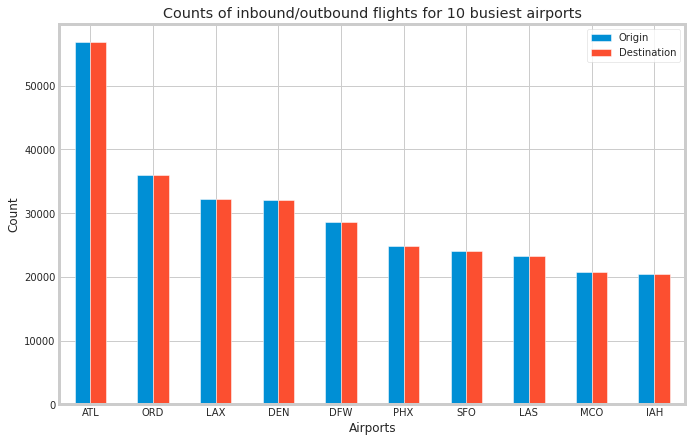

In [69]:
df_top10_airports = pd.DataFrame( {'Origin': top10_origin_airports_counts, 
                                  'Destination': top10_dest_airports_counts},
                                 index=top10_origin_airports)

df_top10_airports.plot.bar(rot=0, xlabel='Airports', ylabel='Count', figsize=(10,7), title='Counts of inbound/outbound flights for 10 busiest airports')

del df_top10_airports

Atlanta Airport (ATL) is the busiest airport, with over 50,000 incoming and outgoing flights over the 2-month period.

For each airport, the number of incoming and outgoing flights are roughly equal 

In [70]:
airport_pairs = df.groupby(['ORIGIN', 'DEST']).agg({'DEP_DELAY': ['mean', 'min', 'max', 'count']})
airport_pairs.columns = ['DEP_DELAY_MEAN', 'DEP_DELAY_MIN', 'DEP_DELAY_MAX', 'COUNTS']
airport_pairs = airport_pairs.reset_index()

airport_pairs = airport_pairs[airport_pairs.COUNTS > 20]

print('Parameters of ORIGIN-DESTINATION airport pairs')
print('Number of airport pairs considered: ', len(airport_pairs))

airport_pairs.sort_values(by='DEP_DELAY_MEAN', ascending=False)

Parameters of ORIGIN-DESTINATION airport pairs
Number of airport pairs considered:  3775


,ORIGIN,DEST,DEP_DELAY_MEAN,DEP_DELAY_MIN,DEP_DELAY_MAX,COUNTS
2171,LGA,CAE,77.175000,-14.0,1020.0,40
2172,LGA,CHO,71.743590,-19.0,967.0,39
90,ASE,SFO,69.808219,-28.0,1064.0,73
4089,VPS,DFW,69.181818,-14.0,1244.0,22
3387,RST,ORD,61.379310,-24.0,1036.0,29
...,...,...,...,...,...,...
4091,WRG,KTN,-13.280702,-37.0,19.0,57
3263,PSG,WRG,-14.666667,-38.0,49.0,57
4102,YAK,JNU,-15.320755,-48.0,79.0,53
1577,HIB,INL,-26.441860,-58.0,155.0,43


ORIGIN-DESTINATION airport pairs with highest and lowest average delay. Only take into account the airport pairs that had at least 20 flights over this 2-month period (average of 10 flights per month) as I wanted to consider flights that were relatively frequent.

Highest Average Delay: 77.2 minutes (late) from LGA to CAE

Lowest Average Delay: -33 minutes (early) from RHI to IMT

## 5.11 Analysis (t-test & Mann-Whitney U test for Hypothesis testing)

**Test if the means of arrival delays (in minutes) in January and February 2017 are equal?**

The arrival delay in minutes for 2 months (January and February).

In [71]:
delayed_jan = df.ARR_DELAY[ ( (df.ARR_DELAY > 0) & (df.MONTH == 1) )] 
print( 'Number of samples in January: ', len(delayed_jan) )
delayed_jan.describe()

Number of samples in January:  172053


count    172053.000000
mean         39.404596
std          66.379678
min           1.000000
25%           7.000000
50%          18.000000
75%          45.000000
max        1944.000000
Name: ARR_DELAY, dtype: float64

In [72]:
delayed_feb = df.ARR_DELAY[ ( (df.ARR_DELAY > 0) & (df.MONTH == 2) )] 
print( 'Number of samples in February: ',len(delayed_feb) )
delayed_feb.describe()

Number of samples in February:  126949


count    126949.000000
mean         33.591671
std          60.100607
min           1.000000
25%           6.000000
50%          15.000000
75%          37.000000
max        1442.000000
Name: ARR_DELAY, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


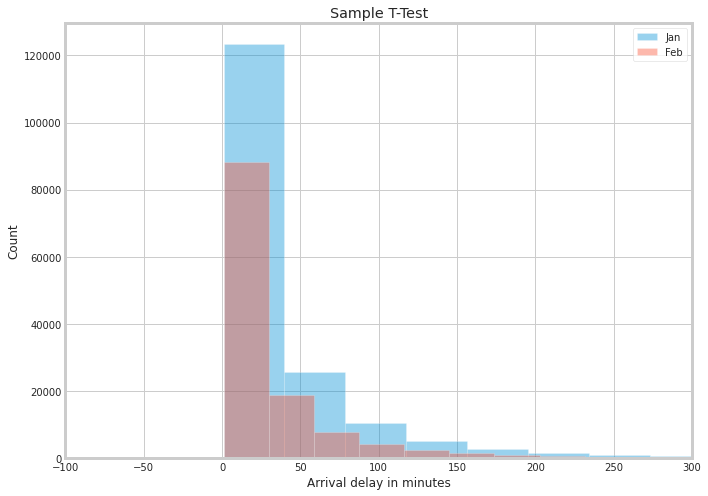

In [73]:
plt.figure(figsize=(10,8))
sns.distplot(delayed_jan,  kde=False, label='Jan')
sns.distplot(delayed_feb,  kde=False, label='Feb')
plt.title("Sample T-Test")
plt.xlim(-100, 300)
plt.xlabel('Arrival delay in minutes')
plt.ylabel('Count')
plt.legend()
plt.show()

Histograms of delayed arrival flights (arrival delay > 0 minutes) for January anf Febuary of 2017

#### 5.11a Independent Sample T-Test

Define the Null and Alternate Hypothesis:


*   Null Hypothesis: the means of both groups are equal (µ1 = µ2)
*   Alternate Hypothesis: the means of both group are not equal (µ1 ≠ µ2)



In [74]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(delayed_jan, delayed_feb, equal_var = False)
print('t-statistic:{0}, p-value:{1}'.format(t_stat, p_value)) # p-Value and the T-Statistic
# P-Value:8.536872289699007e-138 T-Statistic:25.00028507345877

t-statistic:25.00028507345877, p-value:8.536872289699007e-138


There is enough evidence to reject the Null Hypothesis of equal means as the P-Value is low (typically ≤ 0.05).

Statistically speaking, there is enough evidence to conclude that the population means are not equal.

#### 5.11b Mann-Whitney U Test

Define the Null and Alternate Hypothesis:


*   Null Hypothesis: the means of both groups are equal (µ1 = µ2)
*   Alternate Hypothesis: the means of both group are not equal (µ1 ≠ µ2)



In [75]:
#perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(delayed_jan, delayed_feb, alternative='two-sided')
print('u-statistic:{0}, p-value:{1}'.format(u_stat, p_value)) # p-Value and the U-Statistic

u-statistic:11792938467.5, p-value:5.872486532286896e-306


There is enough evidence to reject the Null Hypothesis of equal means as the P-Value is low (typically ≤ 0.05).

# Save the merged data

In [76]:
df.to_csv( os.path.join(data_path, 'merged_data_janfeb.csv'), index=False)